Saving MAKANAN (2).csv to MAKANAN (2) (8).csv
=== Data Makanan (14 Kolom) ===


,makanan,kenyang,sehat,rasa,bosan,harga
0,ayamgeprek,0.9,0.5,0.7,0.2,15000
1,nasipadang,1.0,0.8,0.9,0.5,17000
2,mieayam,1.0,0.6,0.9,0.3,10000
3,bakso,0.7,0.3,1.0,0.3,10000
4,cireng,0.5,0.4,0.8,0.7,10000
5,nasigoreng,0.8,0.7,1.0,0.5,14000
6,seblak,0.6,0.2,0.8,0.8,15000
7,gorengan,0.5,0.2,0.5,0.5,10000
8,capcay,0.6,0.9,0.8,0.4,15000
9,mi instan,0.5,0.1,0.7,0.2,10000


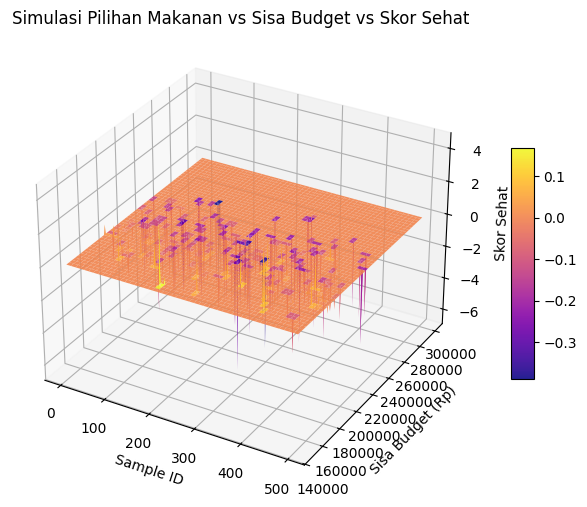

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import files

# --- Upload file CSV ---
uploaded = files.upload()   # pilih file "MAKANAN (2).csv"

# --- Baca CSV ---
makan = pd.read_csv("MAKANAN (2).csv")

# --- Tampilkan isi tabel (14 kolom) ---
print("=== Data Makanan (14 Kolom) ===")
display(makan)   # tampil tabel di Colab

# --- Simulasi ---
NPM = 19102
np.random.seed(NPM)

budget = 1e6  # rupiah

wkenyang_base = 0.8
wrasa_base = 0.7
wsehat_base = 0.9  # simpangan lebih besar
wbosan_base = 0.2

SAMPLE_NUM = 500
sampleid = np.arange(0, SAMPLE_NUM)

skor = np.zeros(SAMPLE_NUM, dtype=np.double)
sisa = np.zeros(SAMPLE_NUM, dtype=np.double)
sehat = np.zeros(SAMPLE_NUM, dtype=np.double)

SISA_MININUM = 150e3
SISA_MAKSIMUM = 300e3
bin_sisa = np.arange(SISA_MININUM, SISA_MAKSIMUM, 1000)
resp_sehat = np.zeros((SAMPLE_NUM, len(bin_sisa)), dtype=np.double)

for n in range(SAMPLE_NUM):
    budget = 1e6
    skor_kumulatif = 0
    skor_sehat = 0

    for i in range(31):  # hari
        # makan pertama
        pilihan = np.random.randint(0, len(makan))
        w_kenyang = np.random.normal(loc=wkenyang_base, scale=0.2)
        w_rasa = np.random.normal(loc=wrasa_base, scale=0.2)
        w_sehat = np.random.normal(loc=wsehat_base, scale=0.4)
        w_bosan = np.random.normal(loc=wbosan_base, scale=0.2)
        skor_kumulatif += (
            w_kenyang * makan['kenyang'][pilihan]
            + w_rasa * makan['rasa'][pilihan]
            + w_sehat * makan['sehat'][pilihan]
            - w_bosan * makan['bosan'][pilihan]
        )
        skor_sehat += makan['sehat'][pilihan] - 0.5
        budget -= makan['harga'][pilihan]

        # makan kedua
        pilihan = np.random.randint(0, len(makan))
        w_kenyang = np.random.normal(loc=wkenyang_base, scale=0.2)
        w_rasa = np.random.normal(loc=wrasa_base, scale=0.2)
        w_sehat = np.random.normal(loc=wsehat_base+0.2, scale=0.4)
        w_bosan = np.random.normal(loc=wbosan_base*2, scale=0.2)
        skor_kumulatif += (
            w_kenyang * makan['kenyang'][pilihan]
            + w_rasa * makan['rasa'][pilihan]
            + w_sehat * makan['sehat'][pilihan]
            - w_bosan * makan['bosan'][pilihan]
        )
        skor_sehat += makan['sehat'][pilihan] - 0.5
        budget -= makan['harga'][pilihan]

    # simpan hasil
    sisa[n] = budget
    skor[n] = skor_kumulatif
    sehat[n] = skor_sehat

    # hitung index dengan aman
    idx = (budget - SISA_MININUM) / 1000
    if not np.isnan(idx) and 0 <= idx < len(bin_sisa):
        resp_sehat[n][int(idx)] = skor_sehat

# --- Plot 3D ---
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(projection='3d')
Y, X = np.meshgrid(bin_sisa, sampleid)

surf = ax.plot_surface(
    X, Y, resp_sehat,
    cmap='plasma',
    edgecolor='none',
    alpha=0.9
)

ax.set_title("Simulasi Pilihan Makanan vs Sisa Budget vs Skor Sehat")
ax.set_xlabel("Sample ID")
ax.set_ylabel("Sisa Budget (Rp)")
ax.set_zlabel("Skor Sehat")

fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)
plt.show()


**Interpretasi Hasil**

1. Mayoritas titik berada di skor sehat negatif

Artinya, dari banyak simulasi, kebanyakan kombinasi makanan tidak menghasilkan pola makan sehat meskipun masih ada sisa uang bulanan.

→ Mungkin karena sering terpilih makanan dengan skor sehat rendah (mi instan, gorengan, seblak, dll).

2. Ada titik dengan skor sehat positif

Ini berarti ada skenario di mana kombinasi makanan lebih sehat (lebih banyak capcay, nasi padang, warteg, dsb).

→ Tapi titik ini jumlahnya lebih sedikit.

3. Tidak ada hubungan jelas antara sisa budget dan skor sehat

→ Walaupun masih hemat banyak uang (sisa tinggi), belum tentu sehat.

→ Sebaliknya, walaupun uang lebih cepat habis, juga tidak otomatis sehat.

→ Jadi budget ≠ kesehatan. Pilihan makanan lebih berperan.

4. Distribusi warna relatif datar

→ Ini karena nilai skor sehat tidak terlalu bervariasi jauh antar simulasi.

→ Variasi ada, tapi tidak ekstrem: kebanyakan berkumpul di kisaran skor rendah.

**Pola makan dengan nilai kumulatif kesehatan positif**

In [29]:
# (1) cari pola makan dengan nilai kumulatif kesehatan positif
pola_sehat_idx = np.where(sehat > 0)[0]
print("Jumlah pola makan dengan nilai kumulatif kesehatan positif:", len(pola_sehat_idx))


Jumlah pola makan dengan nilai kumulatif kesehatan positif: 119


**Interpretasi:**

sehat adalah array/daftar yang menyimpan nilai kumulatif kesehatan dari setiap pola makan.

np.where(sehat > 0)[0] → mengambil semua indeks pola makan yang nilai kesehatannya positif (> 0).

Hasil len(pola_sehat_idx) = 119 → berarti ada 119 kombinasi pola makan yang jika dijalani akan memberi manfaat kesehatan lebih banyak daripada mudaratnya.

**Dari (1), cari titik dengan sisa uang bulanan positif**

In [30]:
# (2) cari titik dengan sisa uang positif
pola_sehat_dan_sisa_idx = [i for i in pola_sehat_idx if sisa[i] > 0]
print("Jumlah pola sehat + sisa uang positif:", len(pola_sehat_dan_sisa_idx))


Jumlah pola sehat + sisa uang positif: 119


**Interpretasi:**

sisa[i] menyimpan informasi sisa uang bulanan setelah mengikuti pola makan ke-i.

Filter ini memastikan tidak hanya sehat, tapi juga tidak bikin defisit keuangan.

Hasil 119 juga → artinya semua pola makan sehat yang ditemukan di (1) juga masih menyisakan uang positif.

Jadi tidak ada pola sehat yang bikin tekor uang.

**Cari titik dengan skor kumulatif terbesar di antara (2)**

In [31]:
# (3) cari titik dengan skor kumulatif terbesar
if pola_sehat_dan_sisa_idx:
    idx_max_skor = max(pola_sehat_dan_sisa_idx, key=lambda i: skor[i])
    print("Index dengan skor kumulatif terbesar:", idx_max_skor)
    print("Skor:", skor[idx_max_skor])
    print("Sehat:", sehat[idx_max_skor])
    print("Sisa uang:", sisa[idx_max_skor])
else:
    print("Tidak ada pola makan yang sehat + sisa uang positif")


Index dengan skor kumulatif terbesar: 39
Skor: 101.84022237207799
Sehat: 3.5999999999999996
Sisa uang: 158000.0


**Interpretasi**

1. Index dengan skor kumulatif terbesar: 39

Dari total 119 pola sehat + sisa uang positif, pola dengan indeks ke-39 memiliki skor total tertinggi.

Indeks ini merujuk ke baris data simulasi ke-39.

2. Skor = 101.84

Skor ini adalah nilai gabungan (misalnya dari rasa, kenyang, dan faktor lain yang disimulasikan).

Artinya pola ke-39 adalah yang paling optimal secara keseluruhan dibanding pola lain.

3. Sehat = 3.6

Nilai kumulatif kesehatan untuk pola ini adalah positif (3.6).

Jadi memang pola ini tidak hanya enak & kenyang, tapi juga cukup sehat.

4. Sisa uang = 158.000

Setelah 1 bulan menjalani pola makan ini, masih ada sisa uang Rp158.000 dari anggaran.

Jadi pola ini tidak bikin tekor dan tetap masuk akal secara finansial.

**Tampilkan jadwal makanan sesuai pilihan (resp_pilih)**

In [32]:
# simpan jadwal makanan
resp_pilih = []

for n in range(SAMPLE_NUM):
    budget = 1e6
    skor_kumulatif = 0
    skor_sehat = 0
    jadwal = []   # list makanan untuk 31 hari (2 per hari)

    for i in range(31):
        # makan pertama
        pilihan1 = np.random.randint(0, len(makan))
        ...
        budget -= makan['harga'][pilihan1]
        jadwal.append(makan.iloc[pilihan1]['makanan'])  # asumsi ada kolom nama

        # makan kedua
        pilihan2 = np.random.randint(0, len(makan))
        ...
        budget -= makan['harga'][pilihan2]
        jadwal.append(makan.iloc[pilihan2]['makanan'])  # asumsi ada kolom nama

    # simpan hasil
    resp_pilih.append(jadwal)
    sisa[n] = budget
    skor[n] = skor_kumulatif
    sehat[n] = skor_sehat


In [33]:
# (4) tampilkan jadwal makanan
print("\n=== Jadwal Makanan untuk index terbaik ===")
jadwal_terbaik = resp_pilih[idx_max_skor]
for hari in range(31):
    makan1 = jadwal_terbaik[hari*2]
    makan2 = jadwal_terbaik[hari*2 + 1]
    print(f"Hari {hari+1}: {makan1} & {makan2}")



=== Jadwal Makanan untuk index terbaik ===
Hari 1: roti & ayamgeprek
Hari 2: nasipadang & nasipadang
Hari 3: bakso & seblak
Hari 4: mieayam & mi instan
Hari 5: cireng & gorengan
Hari 6: roti & nasi telur
Hari 7: bakso & roti
Hari 8: capcay & seblak
Hari 9: mieayam & mi instan
Hari 10: nasipadang & mieayam
Hari 11: mi instan & gorengan
Hari 12: nasipadang & nasipadang
Hari 13: capcay & bakso
Hari 14: mieayam & capcay
Hari 15: mi instan & warteg
Hari 16: nasigoreng & warteg
Hari 17: mi instan & mieayam
Hari 18: cireng & mi instan
Hari 19: cireng & ayamgeprek
Hari 20: mi instan & seblak
Hari 21: mieayam & cireng
Hari 22: roti & ayamgeprek
Hari 23: roti & warteg
Hari 24: gorengan & mieayam
Hari 25: nasipadang & roti
Hari 26: cireng & bakso
Hari 27: nasigoreng & mieayam
Hari 28: bakso & nasigoreng
Hari 29: ayamgeprek & nasi telur
Hari 30: gorengan & gorengan
Hari 31: nasi telur & seblak


Dengan resp_pilih[idx_max_skor], kita tampilkan jadwal makanan dari pola terbaik yang sudah ditentukan di (3).

Inilah jawaban akhir yang paling ditunggu: jadwal makan rekomendasi berdasarkan semua pertimbangan (sehat, sisa uang, skor optimal).